# Census Income Project

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls.These are:

 1. A single cell estimate of the population 16+ for each state.
 2. Controls for Hispanic Origin by age and sex.
 3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


## Import Necessary Libaraies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Import the dataset

In [2]:
# Import csv file to DataFrame
df = pd.read_csv('census_income.csv')

In [3]:
print('No. of Rows    :',df.shape[0])
print('No. of Columns :',df.shape[1])

df.head()

No. of Rows    : 32560
No. of Columns : 15


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In the dataset we seems both continous and cateogrical columns present. and target columns is categorical variable

In [4]:
# Checking the columns of the dataset
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
# Checking the name of columns, its counts and its datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We see in the dataset int64(6), object(9) and we also see there are no missing values.

In [6]:
# Checking duplicates values
df.duplicated().sum()

24

We see in the dataset 24 duplicates values. So we remove it.

In [7]:
df.drop_duplicates(keep='last',inplace=True)

df.shape

(32536, 15)

We remove duplicates values.

In [8]:
# Checking the missing values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We see there are no misisng values in the dataset.

In [9]:
# Let check if any whitespace, 'NA' or '-' exist in dataset.
df.isin([' ','NA','-','?']).sum().any()

False

No whitespace, NA, '-' exist in dataset.

In [10]:
# Checking unique value of each columns
df.nunique().to_frame('No. of unique values')

,No. of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [11]:
# Checking the value count of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


Fnlwgt
164190    13
123011    13
203488    13
121124    12
113364    12
          ..
140176     1
318264     1
329205     1
171373     1
257302     1
Name: count, Length: 21647, dtype: int64


Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool       

We see in Workclass columns a class ' ?'. We check '?' this seems different it lies with space. Let check how many question mark (" ?") inside dataset.

In [12]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

We found there columns which have '?' values. Let replace with np.NaN

In [13]:
# Let replace ' ?' with np.NaN
df = df.replace(' ?',np.NaN)

We have Replace ' ?' with np.NaN

In [14]:
# Checking missing values 
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

We filled thse missing values.

In [15]:
# Filling Missing value with mode for categorical features

df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

Occupation, Workclass and Native Country are categorical variable so we can imputate them with mode of that feature.

In [16]:
# Checking missing values is filled
df.isnull().sum().sum()

0

It better there are no missing values.

In [17]:
# Separating numerical and categorical variable

Numerical = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

Categorical = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex',
          'Native_country','Income']

## Distribution of the dataset

In [18]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From the above discription we can observe the following:-
    
 1. The counts of all the columns are same which means there are no missing values in the dataset.
 2. The mean values is greater than median (50%) in Age.
 3. We see the Capital_gain, Capital_loss has min,25,50,75 has 0.
 3. The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
 4. The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
 5. While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
 6. The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

## Data Visualization

### Univariate Analysis

Income
 <=50K    75.906688
 >50K     24.093312
Name: proportion, dtype: float64


<Axes: xlabel='Income', ylabel='count'>

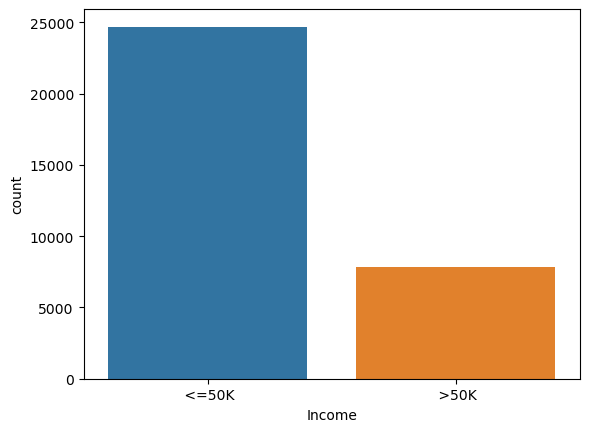

In [19]:
# Let's visualize target columns
print(df['Income'].value_counts(normalize=True)*100)

sns.countplot(x = df['Income'])

75.9 % population (24697 peoples) have income less than 50K., Our task is to predict income and we see that target variable income is imbalanced.

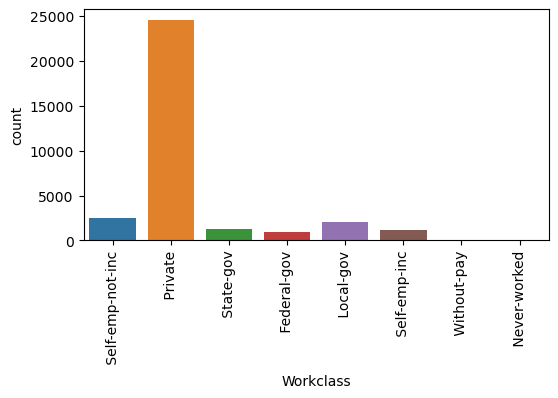

In [20]:
# Checking the count of Workclass column
plt.figure(figsize=(6,3))
sns.countplot(x = 'Workclass',data =df)
plt.xticks(rotation=90)
plt.show()

In workclass the the count of Private is very high and Without-pay and Never-worked is null.

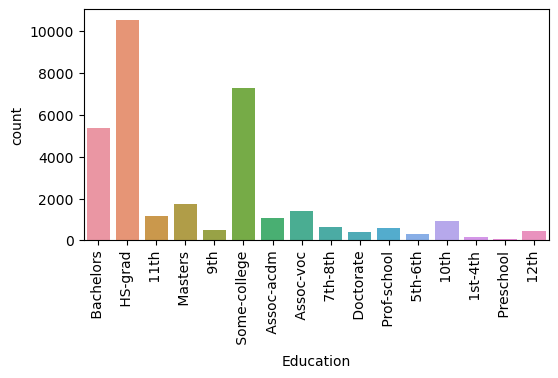

In [21]:
# Checking the count of Education column
plt.figure(figsize=(6,3))
sns.countplot(x = 'Education',data =df)
plt.xticks(rotation=90)
plt.show()

In Education the count of HS-grad or Some-collage is very high than others.

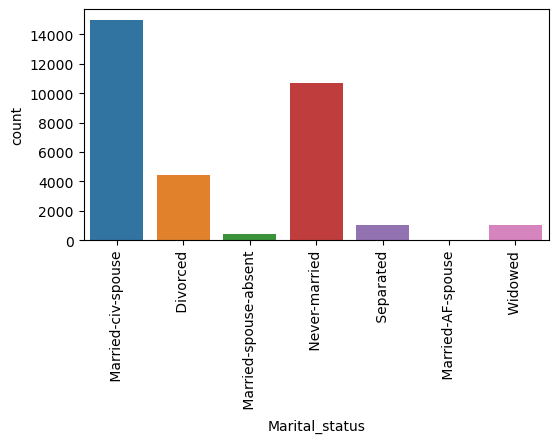

In [22]:
# Checking the count of Marital_status column
plt.figure(figsize=(6,3))
sns.countplot(x = 'Marital_status',data =df)
plt.xticks(rotation=90)
plt.show()

In Marital_status the count of Married-civ-spouse and never-married is very high high compare than others.

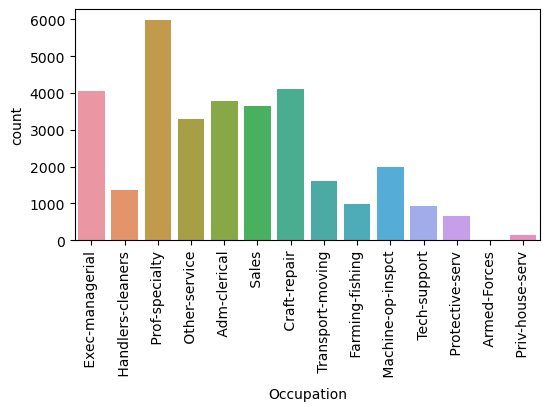

In [23]:
# Checking the count of Occupation column
plt.figure(figsize=(6,3))
sns.countplot(x = 'Occupation',data =df)
plt.xticks(rotation=90)
plt.show()

In Occupation the count of Prof-specialty, other-serve, Adm-cherical,Sales, Craft-repair is high than others.

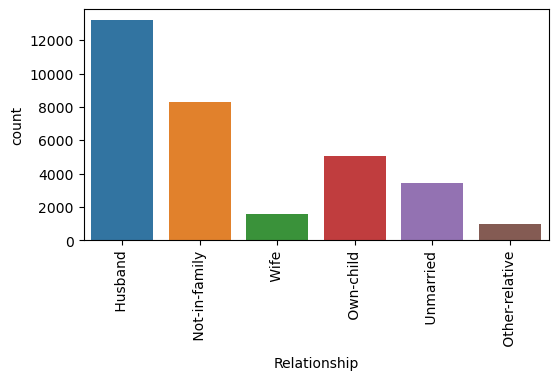

In [24]:
# Checking the count of Relationship column
plt.figure(figsize=(6,3))
sns.countplot(x = 'Relationship',data =df)
plt.xticks(rotation=90)
plt.show()

In Relationship columns the count of Husband or Not-in-family is high than others.

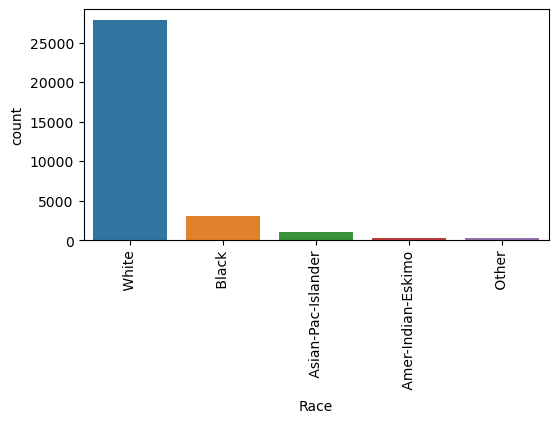

In [25]:
# Checking the count of Race column
plt.figure(figsize=(6,3))
sns.countplot(x = 'Race',data =df)
plt.xticks(rotation=90)
plt.show()

In Race columns the count of White is very high then others.

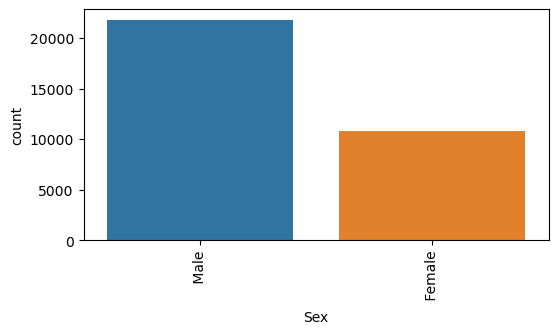

In [26]:
# Checking the count of Sex column
plt.figure(figsize=(6,3))
sns.countplot(x = 'Sex',data =df)
plt.xticks(rotation=90)
plt.show()

In Sex columns the count of Male is double then female.

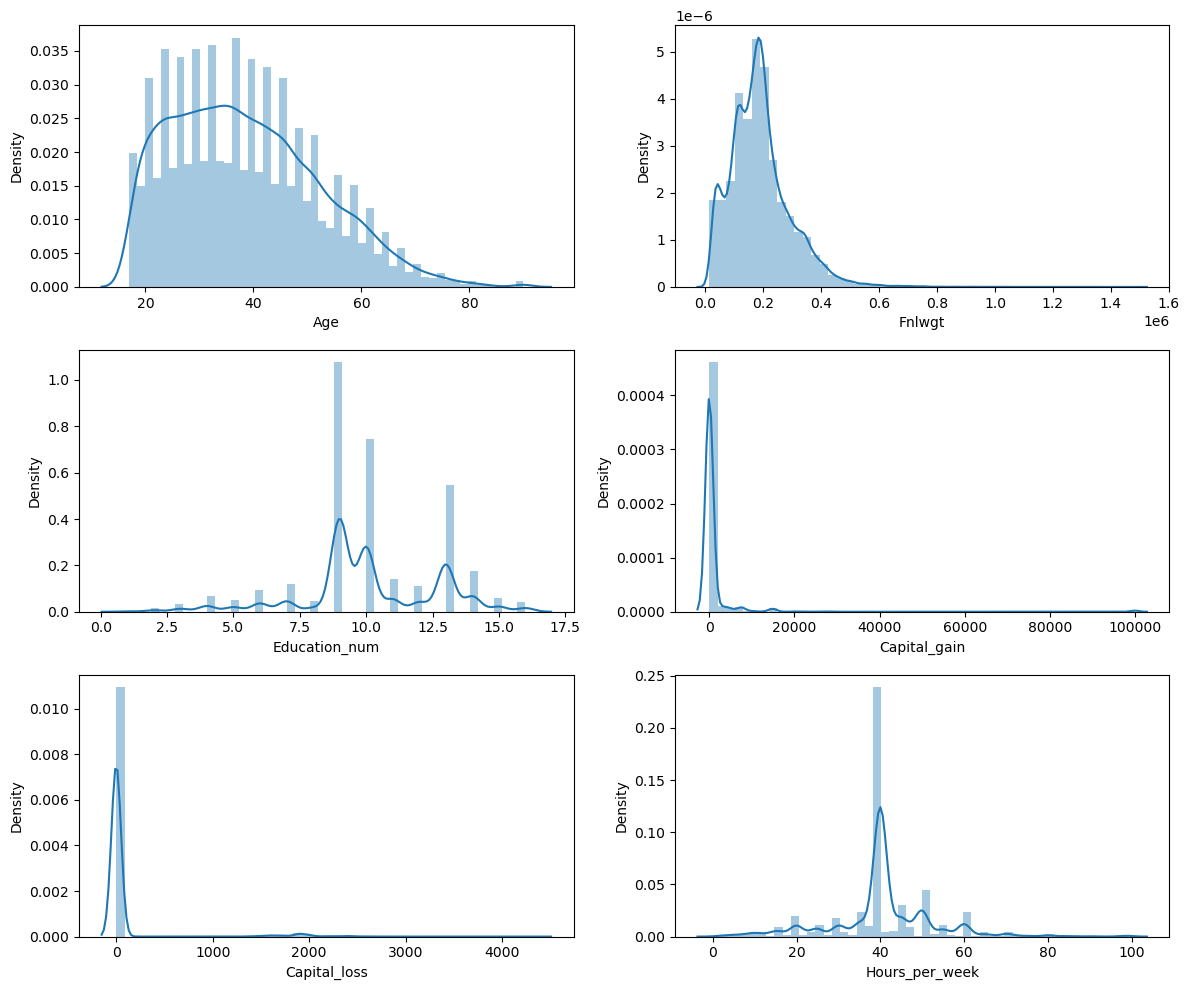

In [27]:
# Let's check how to distirbuted out dataset using Distplot
plt.figure(figsize=(12,10),facecolor='white')
plotnumber = 1

for col in Numerical:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data not normal all the columns has skewness both right and left.

## Bivariate Anaylsis

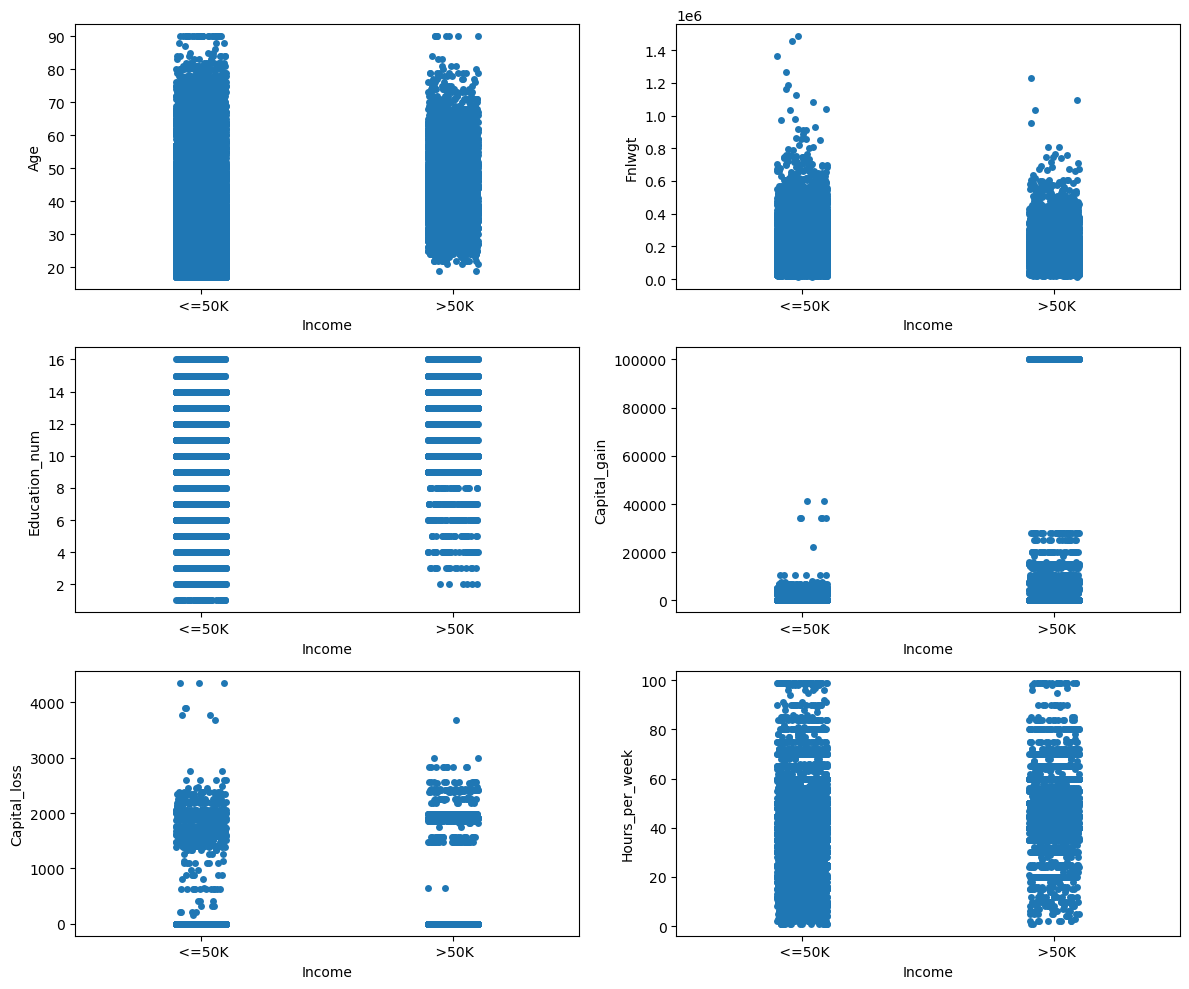

In [28]:
# Let's check the relationship between feature and label using stripplot
plt.figure(figsize=(12,10),facecolor='white')
plotnumber = 1

for col in Numerical:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.stripplot(x = 'Income',y=col, data=df)
        plt.xlabel('Income')
        plt.ylabel(col)
    plotnumber+=1
plt.tight_layout()

From the above plot we seems Age, Fnlwgt, Education_num, Hours_per_week has strong linear relationship and Capital_gain, Capital_loss has not much linear relationship. 

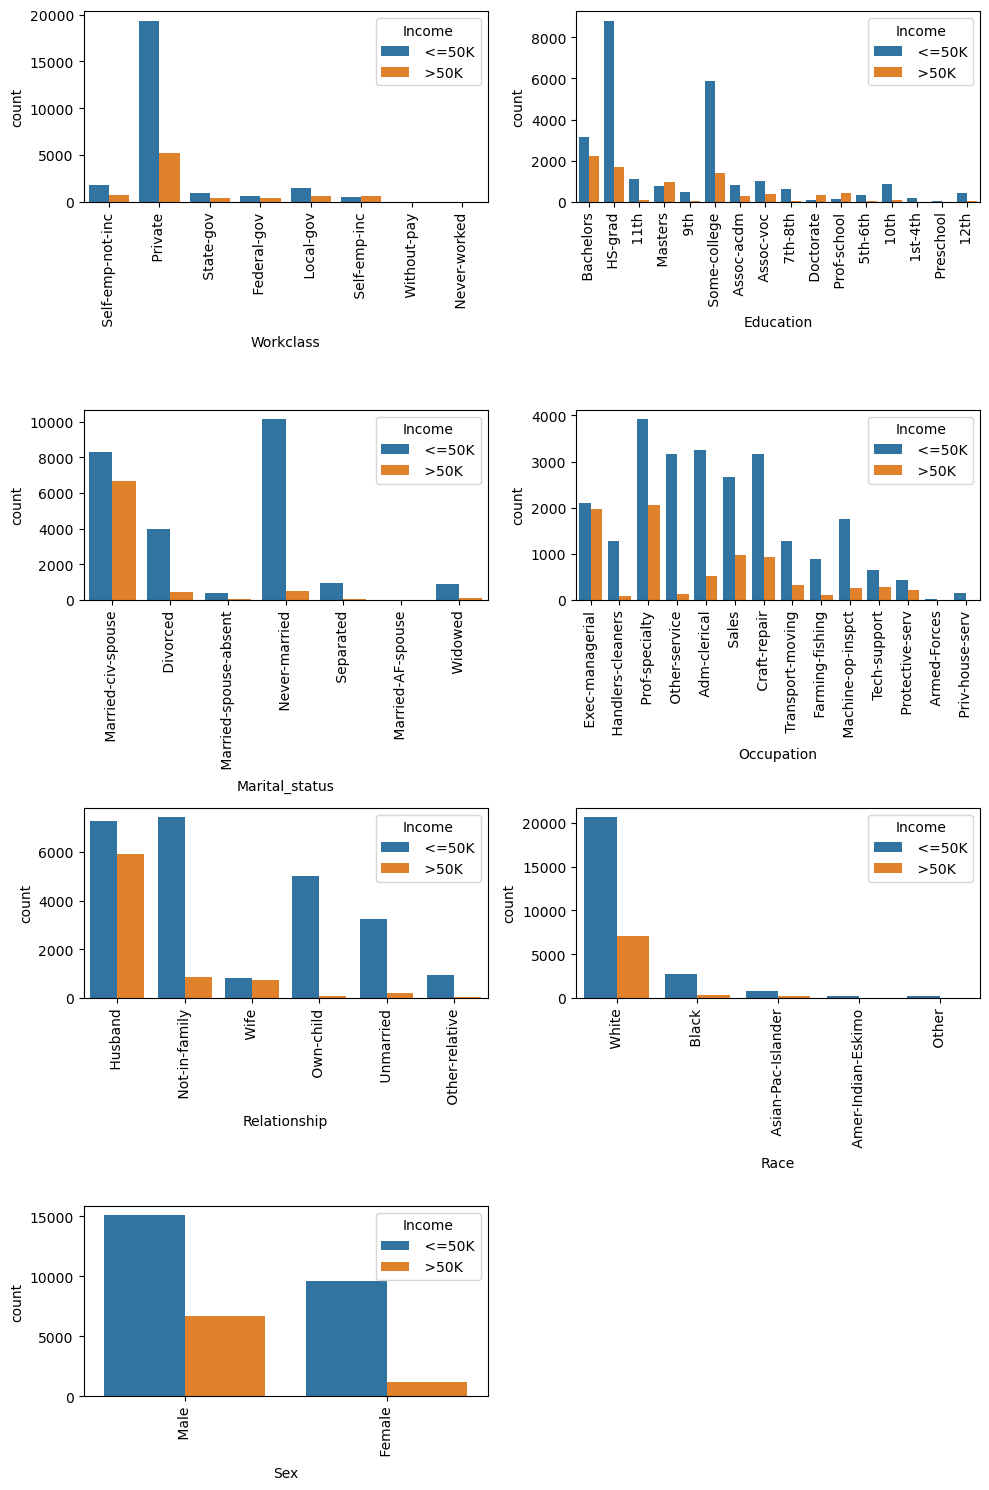

In [29]:
# # Let's check the relationship between feature and label using stripplot
plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for col in Categorical:
    if plotnumber<=7:
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(x=col,hue='Income',data=df)
        plt.xlabel(col)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

1. In Workclass the Private frequency of Income more than 50K is very high compare to less than 50K.
2. In Education the frequency of HS-grad or Some-colage Income more than 50K is very high compare to less than 50K.
3. In Marital_status the frequency of Married-civ-spouse and Never-married Income more than 50K is very high compare to less than 50K.
4. In Occupation the frequency of Prof-specialty, Craft-repair, Exec-managerial, Adm-clerical and Sales Income more than 50K is very high compare to less than 50K.
5. In Relationship the frequency of Husband, Never-married, Not-in-family and one-child Income more than 50K is very high compare to less than 50K.
6. In Race the frequency of white Income more than 50K is very high compare to less than 50K.
7. In Sex the frequency of male Income more than 50K is very high compare to female less than 50K.

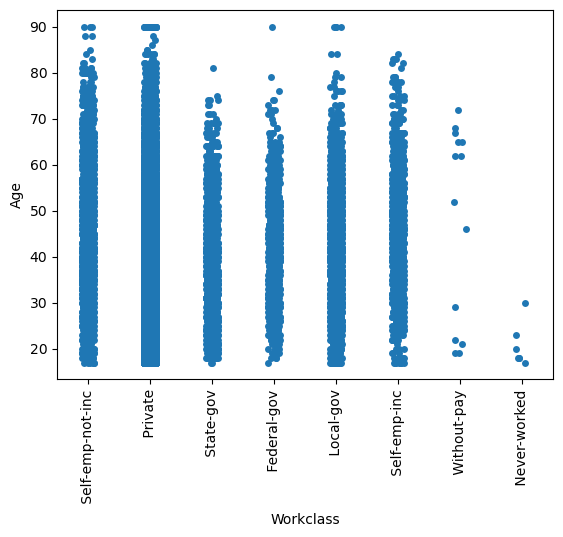

In [30]:
# Let's compare Age vs workclass
sns.stripplot(x='Workclass',y='Age',data=df)
plt.xticks(rotation=90)
plt.show()

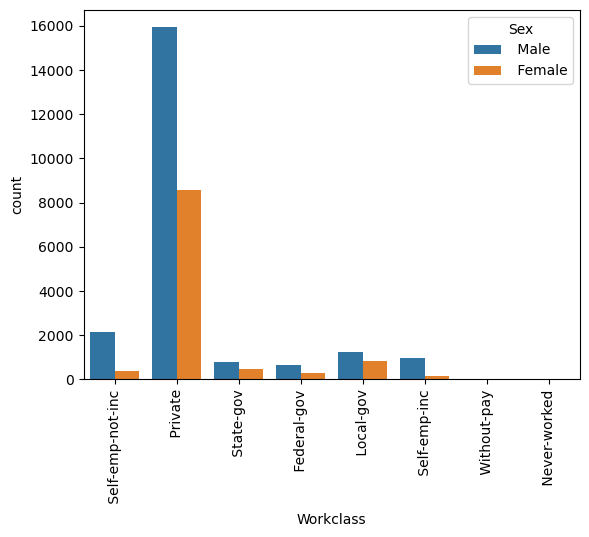

In [31]:
# Let's compare Age vs workclass
sns.countplot(x='Workclass',hue='Sex',data=df)
plt.xticks(rotation=90)
plt.show()

## Multivariate Analysis

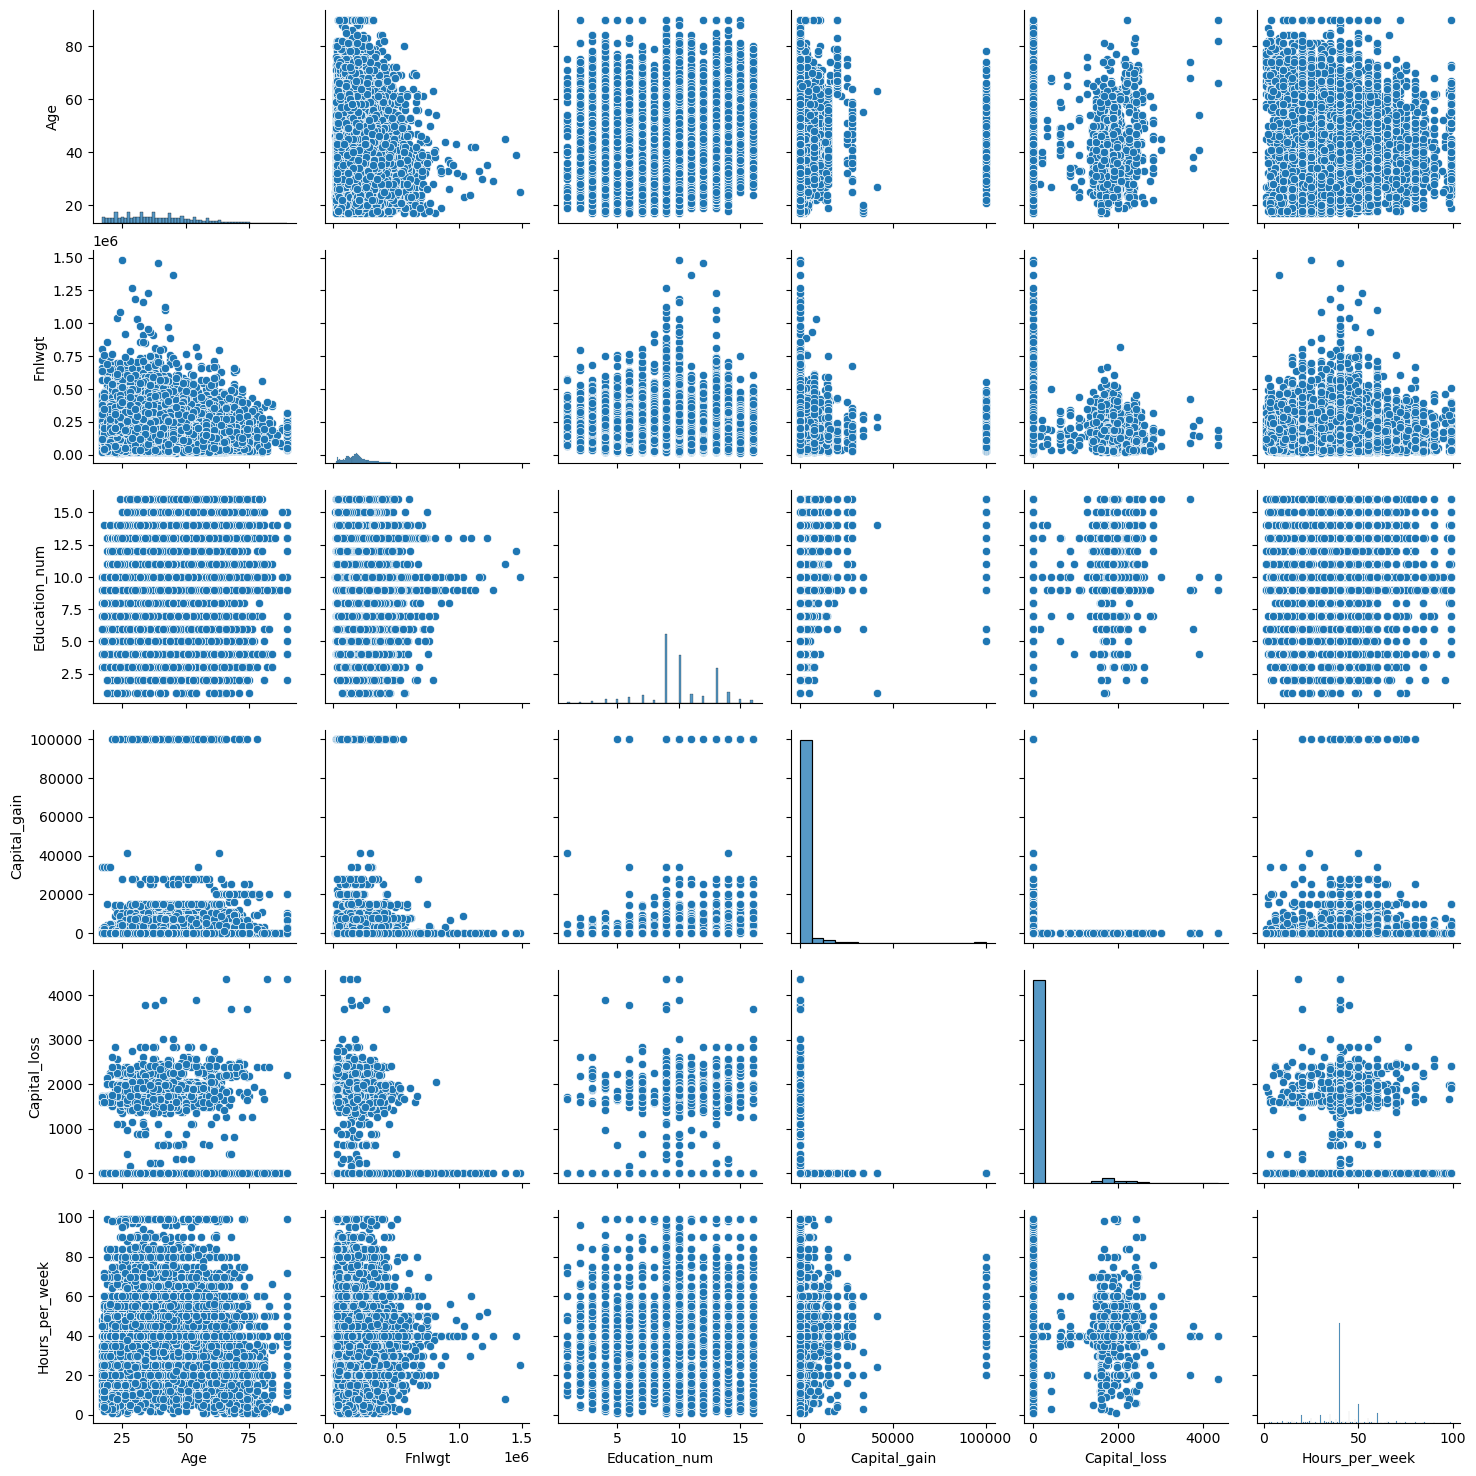

In [32]:
sns.pairplot(df)
plt.show()

In [33]:
# Droping unnecessary columns
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

In [34]:
Numerical.remove('Fnlwgt')

## Identify Outliers

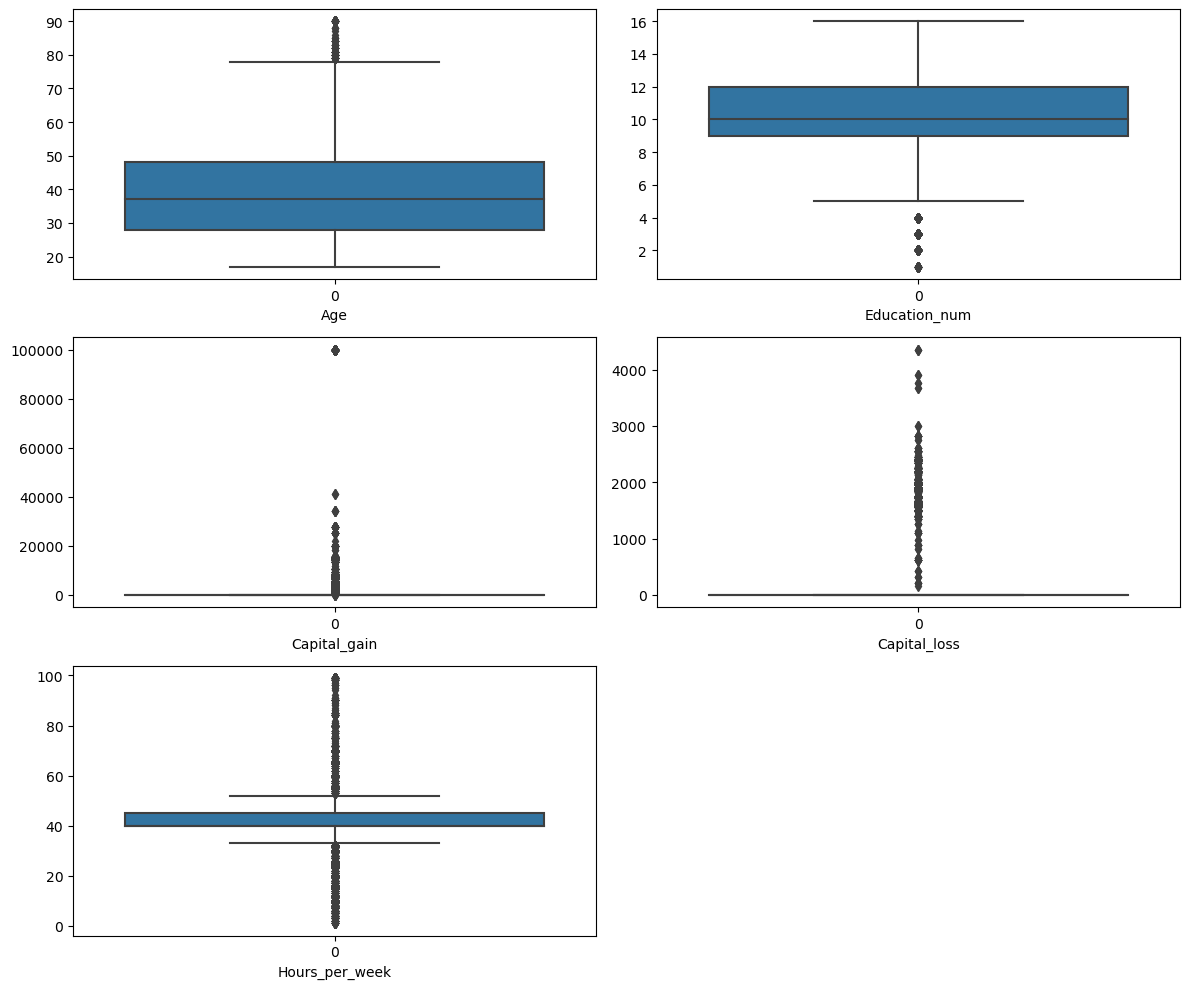

In [35]:
# Checking the outliers using boxplot
plt.figure(figsize=(12,10),facecolor='white')
plotnumber = 1

for col in Numerical:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

All the columns has outliers so we need to remove outliers.

## Outliers Detection and removel

### Checking outliers using zscore method

In [36]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore
df_feature = df[Numerical]

z = np.abs(zscore(df_feature))            # Apply the formula and get the scaled data

df1 = df[(z<3).all(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df1.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Old Data Frame -  32536
New Data Frame -  30130

Data Loss Percentage After removing outliers with zscore method -
  7.394885665109417


### Checking outliers using IQR method

In [37]:
# 1st quantile 
Q1 = df[Numerical].quantile(0.25)

# 3rd quantile
Q3 = df[Numerical].quantile(0.75)

#
IQR = Q3 - Q1

df2 = df[~((df[Numerical]<(Q1 - 1.5 * IQR)) | (df[Numerical]>(Q3 + 1.5 * IQR))).any(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df2.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Old Data Frame -  32536
New Data Frame -  19606

Data Loss Percentage After removing outliers with zscore method -
  39.740595033194


In [38]:
# reassigning the changed dataframe name to our original dataframe name
df = df1

df.shape

(30130, 13)

We use zscore method because its Loss less data then IQR method.

#### Checking how the data has been distributed of numerical columns

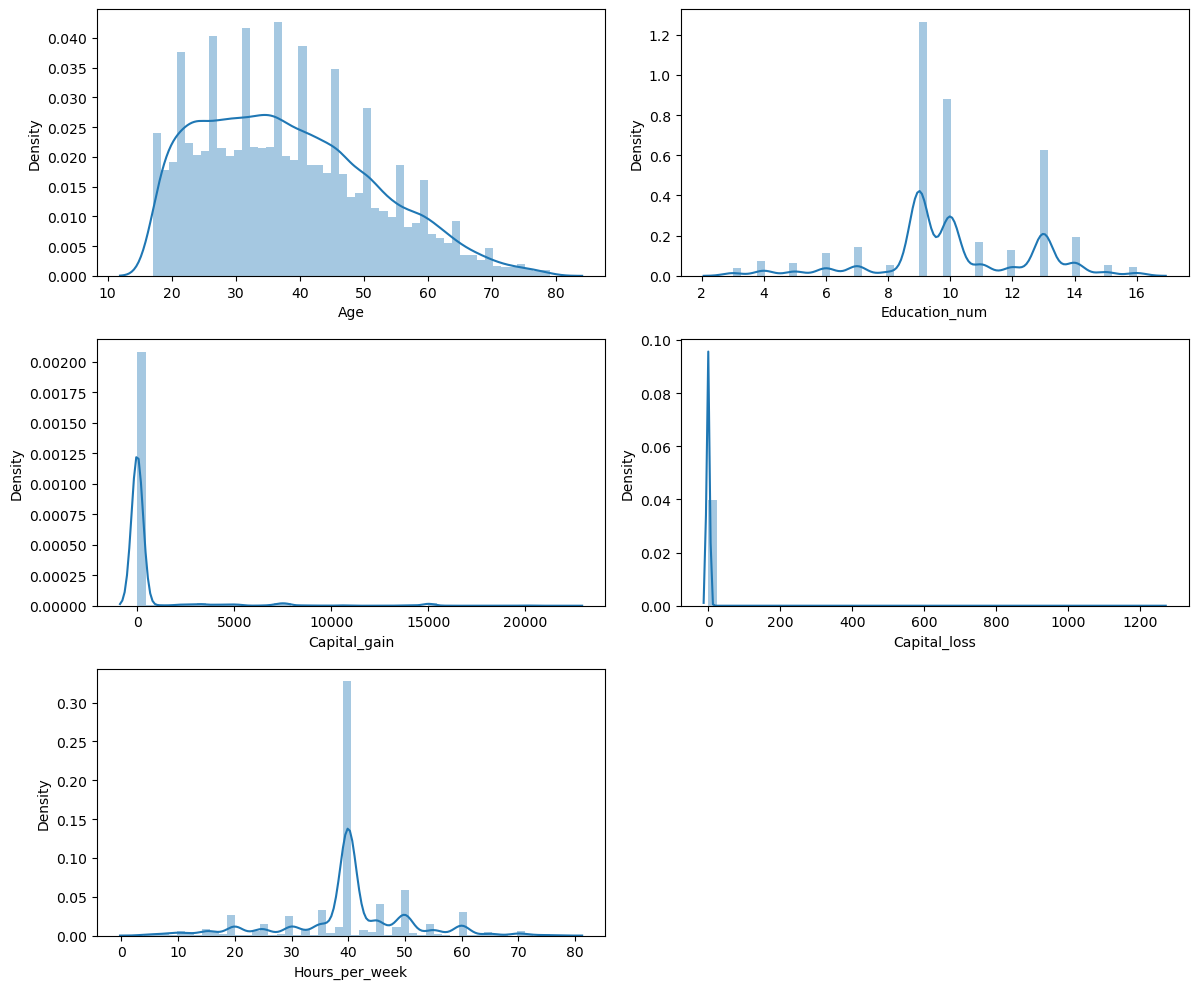

In [39]:
# Checking the distribution of the numerical columns and skewnes
plt.figure(figsize=(12,10),facecolor='white')
plotnumber = 1

for col in Numerical:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

The columns has skewness in te data. So we can remove skewness.

## Checking the skewness

In [40]:
df[Numerical].skew()

Age                0.494118
Education_num     -0.171504
Capital_gain       4.939050
Capital_loss      29.812009
Hours_per_week    -0.353831
dtype: float64

We seen Capitial_gain and Capital_loss has skewed.

**Capital_gain and Capital_loss are numeric variable with lot of zero and high number. So skewness exist in them. There is no point in transforming it because at end data will be skewed.**

## Encoding categorical columns

In [41]:
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i] = LE.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,37,0
1,38,3,9,0,5,1,4,1,0,0,40,37,0
2,53,3,7,2,5,0,2,1,0,0,40,37,0
3,28,3,13,2,9,5,2,0,0,0,40,4,0
4,37,3,14,2,3,5,4,0,0,0,40,37,0


In [42]:
# Checking the datatype of all the columns after impliment enconding technique
df.dtypes

Age               int64
Workclass         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

# Correlation

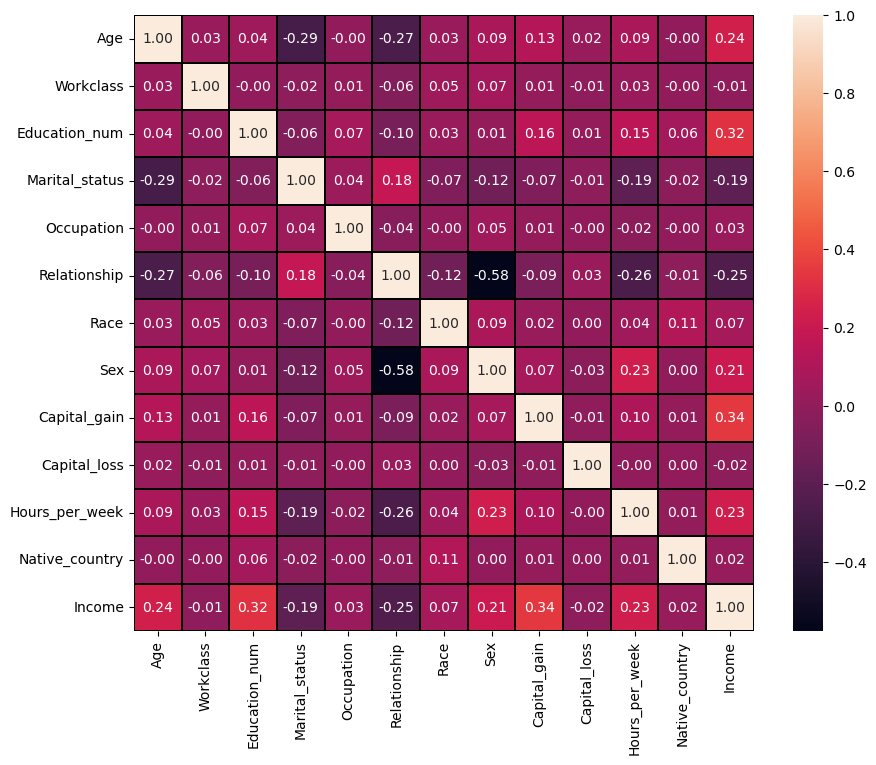

In [43]:
# Checking the correlation between features vs features and feature vs target
df_corr = df.corr()

# Visualizing the correlation using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10},linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

This heamap contains both positive and negative correlation. There is no much postive and negative correlation.

### Correlation between feature vs target

In [44]:
df_corr['Income'].drop('Income').sort_values(ascending=False)

Capital_gain      0.342850
Education_num     0.319362
Age               0.239513
Hours_per_week    0.231240
Sex               0.210062
Race              0.072025
Occupation        0.030899
Native_country    0.017180
Workclass        -0.007043
Capital_loss     -0.016518
Marital_status   -0.194524
Relationship     -0.246478
Name: Income, dtype: float64

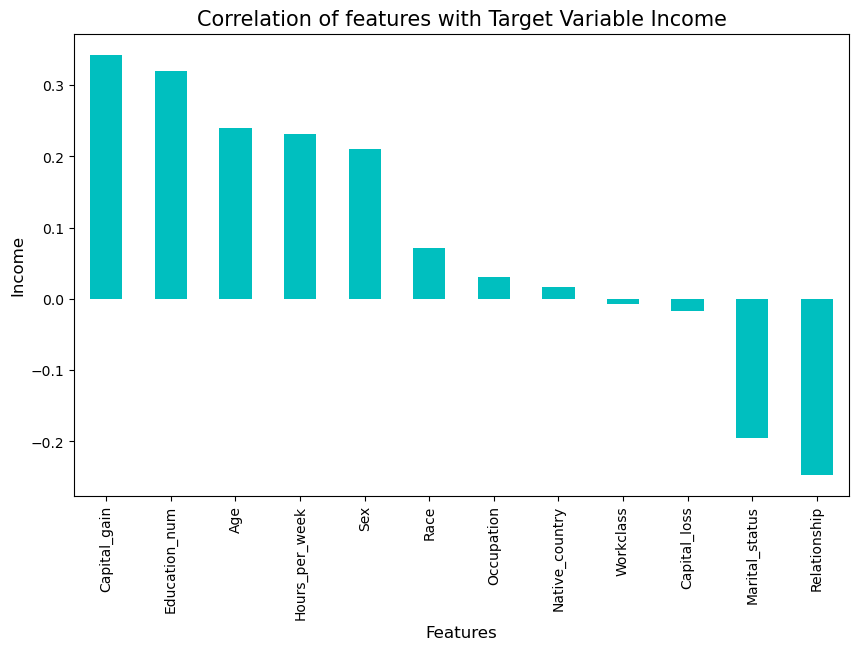

In [45]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (10,6))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Income',fontsize=12)
plt.title('Correlation of features with Target Variable Income',fontsize = 15)
plt.show()

* Workclass and Native_country features are poorly or moderately correlated with target variable. 
* Maximum correlation of 0.561 exist between Capital_gain, Education_num with taget variable.

## Sparating features and target

In [46]:
x = df.drop(columns=['Income'],axis=1)
y = df['Income']

print('Shape of X',x.shape)
print('Shape of y ',y.shape)

Shape of X (30130, 12)
Shape of y  (30130,)


Income
0    23406
1     6724
Name: count, dtype: int64


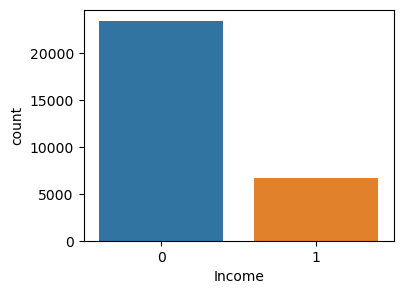

In [47]:
# Checking the count of target columns
print(y.value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x=y)
plt.show()

Here we can see that the data is not balanced, since it is classification problem we will balance the data using oversampling method.

## OverSampling

In [48]:
# Oversampling the data
from imblearn.over_sampling import SMOTE

SM = SMOTE()

x1,y1 = SM.fit_resample(x,y)

Income
0    23406
1    23406
Name: count, dtype: int64


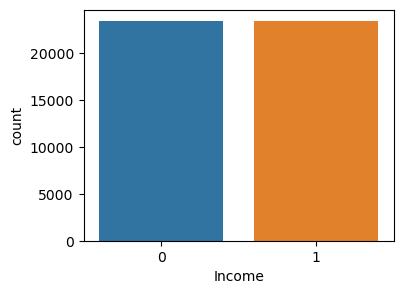

In [49]:
# Checking the count of target columns
print(y1.value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x=y1)
plt.show()

Now the data is balanced.

## Feature Scaling using Standard Scalarization

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

x1.shape

(46812, 12)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

## Checking Variance Inflation Factor (VIF)

In [51]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x1.columns
vif['VIF values'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]

vif

,Feature,VIF values
0,Age,1.172212
1,Workclass,1.005398
2,Education_num,1.078926
3,Marital_status,1.140466
4,Occupation,1.015622
5,Relationship,1.935834
6,Race,1.042533
7,Sex,1.765792
8,Capital_gain,1.050016
9,Capital_loss,1.001796


There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

In [52]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [53]:
maxAccu = 0
maxRs = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu*100,"at random_state", maxRs)  

Best accuracy is  88.90882679654788 at random_state 35


### Creating train test split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=maxRs)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (35109, 12)
The shape of y_train  (35109,)
The shape of x_test   (11703, 12)
The shape of y_test   (11703,)


### Applying all Classification Model

In [55]:
LR  = LogisticRegression()
KNN = KNeighborsClassifier()
DT  = DecisionTreeClassifier()
ET  = ExtraTreeClassifier()
RFC = RandomForestClassifier()
BC  = BaggingClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC(probability=True)
XGB = xgb.XGBClassifier()

models = {'LogisticRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFC,
         'Bagging':BC,'AdaBoost':ABC,'GradientBoosting':GBC,'SVC':SVM,'XGBoost':XGB}

In [56]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    print('\n\033[1m'+'Classification ML Algorithm model is',name,'\033[0m\n')

    print('\033[1m'+'Accuracy Score :'+'\033[0m', acc_score)
    
    print('\n\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    
    print('\n\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(y_test, y_pred))
    
    print('****************************************************************************************')


Classification ML Algorithm model is LogisticRegression 

Accuracy Score : 0.7680936512005468

Confusion matrix : 
 [[4466 1446]
 [1268 4523]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      5912
           1       0.76      0.78      0.77      5791

    accuracy                           0.77     11703
   macro avg       0.77      0.77      0.77     11703
weighted avg       0.77      0.77      0.77     11703

****************************************************************************************

Classification ML Algorithm model is KNeighbors 

Accuracy Score : 0.8547381013415364

Confusion matrix : 
 [[4810 1102]
 [ 598 5193]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      5912
           1       0.82      0.90      0.86      5791

    accuracy                           0.85     11703
   macro avg       0.86      0.8

# Cross Validation

In [57]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    
    score = cross_val_score(model, x1, y1, cv =5)

    print('\n\033[1m'+'Cross Validation Score', name, ':'+'\033[0m\n')
    print("Score          :" ,score)
    print("Mean Score     :",score.mean())
    print('Accuracy Score :',acc_score)
        
    final = acc_score - score.mean()
    print('\nDifferent between Accuracy vs Cross Val Score: ',final)
    
    print('\n***********************************************************************************')


Cross Validation Score LogisticRegression :

Score          : [0.76011962 0.76086724 0.76596881 0.77045503 0.77227088]
Mean Score     : 0.7659363173069176
Accuracy Score : 0.7680936512005468

Different between Accuracy vs Cross Val Score:  0.002157333893629265

***********************************************************************************

Cross Validation Score KNeighbors :

Score          : [0.81373491 0.84129018 0.85879086 0.86082034 0.86210211]
Mean Score     : 0.8473476815830209
Accuracy Score : 0.8547381013415364

Different between Accuracy vs Cross Val Score:  0.00739041975851551

***********************************************************************************

Cross Validation Score DecisionTree :

Score          : [0.81501655 0.84833921 0.87192907 0.86605426 0.87256996]
Mean Score     : 0.854781812523776
Accuracy Score : 0.8511492779629155

Different between Accuracy vs Cross Val Score:  -0.0036325345608605453

*********************************************************

**We can see that LogisticRegression gives less error between accuracy score and CrossValidation.**

* Score          : [0.76011962 0.76086724 0.76596881 0.77045503 0.77227088]
* Mean Score     : 0.7659363173069176
* Accuracy Score : 0.7680936512005468

* Different between Accuracy vs Cross Val Score:  0.002157333893629265

## Hyper Parameter Tuning : GridSearchCV

### Tune the parameter with LogisticRegression model

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False], #default: True
              'penalty': ['l1','l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
              'random_state': [10,20,30]}

GCV = GridSearchCV(estimator = LR, param_grid=param_grid)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  LogisticRegression(penalty='l1', random_state=10, solver='saga')


Best score :  0.7651883548605516


## Final Model

In [64]:
model = GCV.best_estimator_
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('\033[1m'+' Final Model :' +'\033[0m')
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('\nConfusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

 Final Model :
Accuracy Score 0.7680082030248654

Confusion matrix :
 [[4466 1446]
 [1269 4522]]

Classification report :
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      5912
           1       0.76      0.78      0.77      5791

    accuracy                           0.77     11703
   macro avg       0.77      0.77      0.77     11703
weighted avg       0.77      0.77      0.77     11703



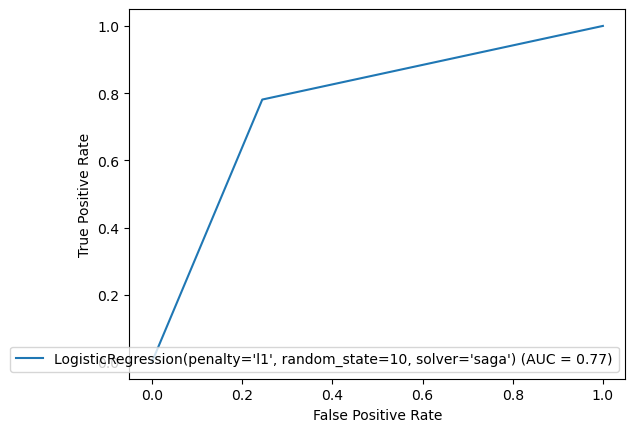

In [65]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 76%

### Saving the model

In [66]:
import joblib
joblib.dump(model,'Census_Income_Project.pkl')

['Census_Income_Project.pkl']

### Predicting the saved model

In [67]:
# Let's load the saved model and get the predictions
model = joblib.load("Census_Income_Project.pkl")

# Prediction 
prediction = model.predict(x_test)
prediction

array([1, 0, 1, ..., 0, 0, 1])